In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
match_df = pd.read_csv('IPL_dataset/matches.csv')
deliveries_df = pd.read_csv('IPL_dataset/deliveries.csv')
ras_df = pd.read_csv('IPL_dataset/most_runs_average_strikerate.csv')

In [3]:
six_df = deliveries_df.loc[(deliveries_df['total_runs']==6) & (deliveries_df['extra_runs']==0)]
six_main_df = six_df.drop(['is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs', 'player_dismissed', 'dismissal_kind', 'fielder', 'extra_runs', 'batsman_runs'], 1)


# MVP Batsman:

Checking for batsman with consistency in T20 format <br>
that is average greater than 30 and strike rate greater than 130

In [4]:
mvp_df = ras_df.loc[(ras_df['average']>=30) & (ras_df['strikerate']>=130)]

In [5]:
mvp_df.head()

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
5,CH Gayle,4525,110,2972,41.136364,152.254374


# Impact Player
Checking for player with highest sr and descent avg for respectable amount of matches

In [25]:
impact_df = ras_df.loc[(ras_df['average']>=25) & (ras_df['total_runs']>=500)].sort_values('strikerate', ascending = False).head()
impact_df

,batsman,total_runs,out,numberofballs,average,strikerate
49,AD Russell,1415,41,752,34.512195,188.164894
38,RR Pant,1767,49,1071,36.061224,164.985994
103,CH Morris,519,20,327,25.950000,158.715596
64,HH Pandya,1082,38,689,28.473684,157.039187
20,V Sehwag,2728,98,1746,27.836735,156.242841


# Match Winner
   Player with most M.O.M

In [7]:
match_df.player_of_match.mode()[0]

'CH Gayle'

In [8]:
match_df.winner.mode()[0]  # Team with most wins

'Mumbai Indians'

In [9]:
match_df.city.mode()[0]  # City with most matches played

'Mumbai'

In [10]:
match_df.venue.mode()[0] # Venue with most matches played

'Eden Gardens'

In [11]:
match_df.sort_values('win_by_runs', ascending = False)['venue'].head() # Venue with highest win margins (runs)

43          Feroz Shah Kotla
619    M Chinnaswamy Stadium
59     M Chinnaswamy Stadium
556    M Chinnaswamy Stadium
410    M Chinnaswamy Stadium
Name: venue, dtype: object

In [12]:
match_df.sort_values('win_by_wickets', ascending = False)['venue'].head() # Venue with highest win margin (wickets)

119                                             Newlands
390           Punjab Cricket Association Stadium, Mohali
34     Punjab Cricket Association IS Bindra Stadium, ...
590               Saurashtra Cricket Association Stadium
71                            Dr DY Patil Sports Academy
Name: venue, dtype: object

# Bowlers Data
various data related to bowlers

In [13]:
dismissal_df = deliveries_df.dropna(subset=['player_dismissed'])

dismissal_df[dismissal_df.dismissal_kind!='run out']['bowler'].mode()[0]

'SL Malinga'

In [14]:
bowler_six_df = six_main_df['bowler'].value_counts().head()
bowler_six_df

PP Chawla          171
A Mishra           169
Harbhajan Singh    142
DJ Bravo           133
RA Jadeja          131
Name: bowler, dtype: int64

In [35]:
bowler_out_df = dismissal_df[dismissal_df.dismissal_kind!='run out']
bowler_out_df['bowler'].value_counts().head()

SL Malinga         170
A Mishra           156
Harbhajan Singh    150
PP Chawla          149
DJ Bravo           147
Name: bowler, dtype: int64

## Per Ball Data

In [46]:
dots_df = deliveries_df[deliveries_df['total_runs']==0].ball.mode()
singles_df = deliveries_df[deliveries_df['total_runs']==1].ball.mode()
doubles_df = deliveries_df[deliveries_df['total_runs']==2].ball.mode()
triples_df = deliveries_df[deliveries_df['total_runs']==3].ball.mode()
fours_df = deliveries_df[deliveries_df['total_runs']==4].ball.mode()
fives_df = deliveries_df[deliveries_df['total_runs']==5].ball.mode()
sixes_df = deliveries_df[deliveries_df['total_runs']==6].ball.mode()

In [54]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [62]:
team_six_df = six_main_df['bowling_team'].value_counts()
team_six_df

Royal Challengers Bangalore    1044
Kings XI Punjab                 972
Mumbai Indians                  948
Kolkata Knight Riders           927
Chennai Super Kings             889
Delhi Daredevils                867
Rajasthan Royals                722
Sunrisers Hyderabad             627
Deccan Chargers                 406
Pune Warriors                   216
Gujarat Lions                   190
Rising Pune Supergiant           96
Delhi Capitals                   89
Rising Pune Supergiants          75
Kochi Tuskers Kerala             65
Name: bowling_team, dtype: int64

## Per Over Data

In [135]:
total_games = 756

In [136]:
over_run_df = deliveries_df[['over', 'total_runs']]
over1_run = over_run_df.loc[over_run_df['over']==1].total_runs.sum()//total_games
over2_run = over_run_df.loc[over_run_df['over']==2].total_runs.sum()//total_games
over3_run = over_run_df.loc[over_run_df['over']==3].total_runs.sum()//total_games
over4_run = over_run_df.loc[over_run_df['over']==4].total_runs.sum()//total_games
over5_run = over_run_df.loc[over_run_df['over']==5].total_runs.sum()//total_games
over6_run = over_run_df.loc[over_run_df['over']==6].total_runs.sum()//total_games
over7_run = over_run_df.loc[over_run_df['over']==7].total_runs.sum()//total_games
over8_run = over_run_df.loc[over_run_df['over']==8].total_runs.sum()//total_games
over9_run = over_run_df.loc[over_run_df['over']==9].total_runs.sum()//total_games
over10_run = over_run_df.loc[over_run_df['over']==10].total_runs.sum()//total_games
over11_run = over_run_df.loc[over_run_df['over']==11].total_runs.sum()//total_games
over12_run = over_run_df.loc[over_run_df['over']==12].total_runs.sum()//total_games
over13_run = over_run_df.loc[over_run_df['over']==13].total_runs.sum()//total_games
over14_run = over_run_df.loc[over_run_df['over']==14].total_runs.sum()//total_games
over15_run = over_run_df.loc[over_run_df['over']==15].total_runs.sum()//total_games
over16_run = over_run_df.loc[over_run_df['over']==16].total_runs.sum()//total_games
over17_run = over_run_df.loc[over_run_df['over']==17].total_runs.sum()//total_games
over18_run = over_run_df.loc[over_run_df['over']==18].total_runs.sum()//total_games
over19_run = over_run_df.loc[over_run_df['over']==19].total_runs.sum()//total_games
over20_run = over_run_df.loc[over_run_df['over']==20].total_runs.sum()//total_games

In [140]:
over_run_df[over_run_df['over']==1]

,over,total_runs
0,1,0
1,1,0
2,1,4
3,1,0
4,1,2
...,...,...
178955,1,0
178956,1,4
178957,1,1
178958,1,0


In [162]:
over1_df = over_run_df[over_run_df['over']==1]

over_1_runs = over1_df['total_runs'].sum()//total_games
over_1_runs

12

# Data Cleaning

In [15]:
match_df.drop('umpire3', 1)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford


# Data Visualization

## Pie Chart

### Bowlers Hit for most sixes

In [16]:
# define data

data = [171, 169, 142, 133, 131]
labels = ['Piyush Chawla', 'Amit Mishra', 'Harbhajan Singh', 'DJ Bravo', 'Ravindra jadeja']

In [17]:
# define seaborn color pallete

colors = sns.color_palette("Set2")

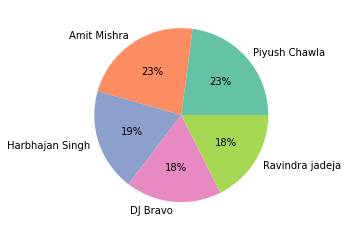

In [18]:
# create pie chart

plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

## Bar Graph

### MVP Batsman

In [19]:
mvp_df.drop(['out', 'numberofballs', 'average', 'strikerate'], 1).head()

,batsman,total_runs
0,V Kohli,5426
1,SK Raina,5386
2,RG Sharma,4902
3,DA Warner,4717
5,CH Gayle,4525


In [20]:
df = pd.DataFrame({'batsman':['Virat Kohli','Suresh Raina','Rohit Sharma','David Warner','Chris Gayle'], 
    'total_runs': [5426, 5386, 4902, 4717, 4525]})

In [21]:
sns.set_style('darkgrid')

<AxesSubplot:xlabel='total_runs', ylabel='batsman'>

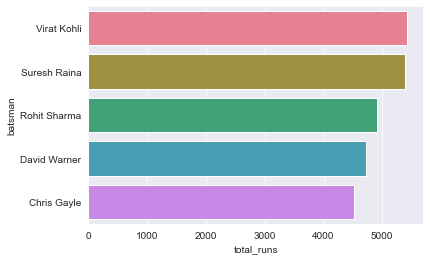

In [22]:
sns.barplot(x='total_runs', y='batsman', data=df, palette= 'husl')

In [23]:
# Impact player graph !
# wickets data & graph
# venue graph
# boundaries by batsman graph
# boundaries by bowlers graph

## Impact Batsman 

In [26]:
impact_df

,batsman,total_runs,out,numberofballs,average,strikerate
49,AD Russell,1415,41,752,34.512195,188.164894
38,RR Pant,1767,49,1071,36.061224,164.985994
103,CH Morris,519,20,327,25.950000,158.715596
64,HH Pandya,1082,38,689,28.473684,157.039187
20,V Sehwag,2728,98,1746,27.836735,156.242841


<AxesSubplot:xlabel='strikerate', ylabel='batsman'>

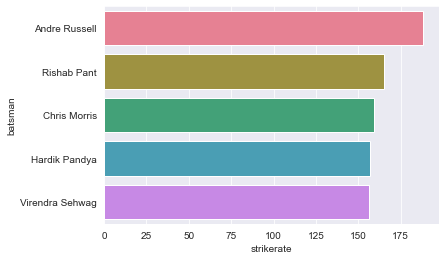

In [28]:
df2 = pd.DataFrame({'batsman':['Andre Russell','Rishab Pant','Chris Morris','Hardik Pandya','Virendra Sehwag'], 
    'strikerate': [188, 165, 159, 157, 156]})

sns.set_style('darkgrid')

sns.barplot(x='strikerate', y='batsman', data=df2, palette= 'husl')